In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('energy_dataset.csv')
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [4]:
df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [5]:
df=df.drop(['generation fossil coal-derived gas',
                           'generation fossil oil shale',
                           'generation fossil peat', 
                            'generation geothermal',
            'generation hydro pumped storage aggregated', 
            'generation marine', 'generation wind offshore',
        'forecast wind offshore eday ahead', 'total load forecast',
        'forecast solar day ahead', 'forecast wind onshore day ahead'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [7]:
df.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [8]:
def fill_missing_values(df,col):
    df[col]=df[col].fillna(df[col].mean())
    return df[col]   

In [9]:
df['generation biomass']=fill_missing_values(df,'generation biomass')
df['generation fossil brown coal/lignite']=fill_missing_values(df,'generation fossil brown coal/lignite')
df['generation fossil gas']=fill_missing_values(df,'generation fossil gas')
df['generation fossil hard coal']=fill_missing_values(df,'generation fossil hard coal')
df['generation fossil oil']=fill_missing_values(df,'generation fossil oil')
df['generation hydro pumped storage consumption']=fill_missing_values(df,'generation hydro pumped storage consumption')
df['generation hydro run-of-river and poundage']=fill_missing_values(df,'generation hydro run-of-river and poundage')
df['generation hydro water reservoir']=fill_missing_values(df,'generation hydro water reservoir')
df['generation nuclear']=fill_missing_values(df,'generation nuclear')
df['generation other']=fill_missing_values(df,'generation other')
df['generation other renewable']=fill_missing_values(df,'generation other renewable')
df['generation solar']=fill_missing_values(df,'generation solar')
df['generation waste']=fill_missing_values(df,'generation waste')
df['generation wind onshore']=fill_missing_values(df,'generation wind onshore')
df['total load actual']=fill_missing_values(df,'total load actual')

In [10]:
df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [11]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,28696.939905,49.874341,57.884023
std,85.330814,354.477568,2201.265238,1961.097443,52.506441,792.191889,400.668934,1834.728624,839.464380,20.233185,14.073940,1679.688577,50.181934,3212.866588,4572.638723,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4127.000000,2528.750000,263.000000,0.000000,637.000000,1078.000000,5761.000000,53.000000,74.000000,71.000000,240.000000,2933.750000,24810.000000,41.490000,49.347500
50%,367.000000,509.000000,4971.000000,4473.000000,300.000000,68.000000,906.000000,2165.000000,6563.500000,57.000000,88.000000,616.000000,279.000000,4850.500000,28894.000000,50.520000,58.020000
75%,433.000000,757.000000,6428.000000,5837.000000,330.000000,615.000000,1250.000000,3756.250000,7024.000000,80.000000,97.000000,2575.250000,310.000000,7397.000000,32186.250000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,101.990000,116.800000


In [12]:
df['time']=pd.to_datetime(df['time'],utc=True,infer_datetime_format = True)
df.tail()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_30772\356646963.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time']=pd.to_datetime(df['time'],utc=True,infer_datetime_format = True)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
35059,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02
35060,2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,68.40,76.16
35061,2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,66.88,74.30
35062,2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,63.93,69.89
35063,2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,24455.0,64.27,69.88


In [13]:
def plot_series(df, col, start_time, end_time):
    # Filter the DataFrame for the specified time range
    mask = (df['time'] >= start_time) & (df['time'] <= end_time)
    df_filtered = df.loc[mask]
    
    # Plot the filtered data
    fig = px.line(df_filtered, x='time', y=col, title=f"{col} from {start_time} to {end_time}",
                  labels={'time': 'Time', col: col})
    fig.update_layout(width=900, height=400)  # Adjust the figure size if needed
    fig.show()

In [14]:
plot_series(df,'total load actual','2018-01-01','2018-12-31')

In [15]:
plot_series(df,'price day ahead','2018-01-01','2018-12-31')

In [20]:
import plotly.graph_objects as go

def plot_series2(df, col1, col2, start_time, end_time):
    # Filter the DataFrame for the specified time range
    mask = (df['time'] >= start_time) & (df['time'] <= end_time)
    df_filtered = df.loc[mask]
    
    # Create traces for each line
    trace1 = go.Scatter(x=df_filtered['time'], y=df_filtered[col1], mode='lines', name=col1)
    trace2 = go.Scatter(x=df_filtered['time'], y=df_filtered[col2], mode='lines', name=col2)
    
    # Create the figure
    fig = go.Figure(data=[trace1, trace2])
    fig.update_layout(title=f"{col1} and {col2} from {start_time} to {end_time}",
                      xaxis_title='Time',
                      yaxis_title='Price',
                      width=900, height=400)  # Adjust the figure size if needed
    
    # Show the figure
    fig.show()

# Example usage:
# plot_series(df, 'price_actual', 'price_day_ahead', '2024-01-01', '2024-12-31')


In [22]:
plot_series2(df,'price day ahead','price actual','2018-01-01','2018-06-01')

In [23]:
df.corr()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,1.000000,-0.618774,-0.046326,0.227750,-0.188784,-0.279765,-0.101324,0.131142,-0.097726,-0.093538,-0.450131,0.783399,-0.018316,0.610718,-0.026253,0.048302,0.300529,0.209150
generation biomass,-0.618774,1.000000,0.229804,-0.021660,0.433522,0.459527,-0.044897,-0.284876,-0.033674,-0.021278,0.658488,-0.560588,-0.004687,-0.346322,-0.068658,0.083188,0.108907,0.142303
generation fossil brown coal/lignite,-0.046326,0.229804,1.000000,0.499808,0.768710,0.314868,-0.323770,-0.525003,-0.229455,-0.008440,0.097600,0.104552,0.040447,0.282803,-0.434118,0.280323,0.567709,0.363919
generation fossil gas,0.227750,-0.021660,0.499808,1.000000,0.541635,0.309623,-0.420643,-0.271527,0.060173,-0.112903,-0.066279,0.334880,0.074716,0.275049,-0.397298,0.548620,0.640674,0.461492
generation fossil hard coal,-0.188784,0.433522,0.768710,0.541635,1.000000,0.440831,-0.406113,-0.497933,-0.157677,-0.023930,0.264383,-0.019426,0.046185,0.170229,-0.441853,0.396294,0.671364,0.465426
generation fossil oil,-0.279765,0.459527,0.314868,0.309623,0.440831,1.000000,-0.331010,-0.106752,0.160464,0.015618,0.375045,-0.115087,0.100210,-0.175737,-0.051787,0.496299,0.292687,0.284545
generation hydro pumped storage consumption,-0.101324,-0.044897,-0.323770,-0.420643,-0.406113,-0.331010,1.000000,0.053162,-0.234340,0.013081,0.021508,-0.267439,-0.214645,-0.188086,0.389051,-0.562598,-0.600251,-0.426219
generation hydro run-of-river and poundage,0.131142,-0.284876,-0.525003,-0.271527,-0.497933,-0.106752,0.053162,1.000000,0.652764,-0.124040,-0.127339,0.053435,0.039601,-0.286090,0.223153,0.118493,-0.294614,-0.137042
generation hydro water reservoir,-0.097726,-0.033674,-0.229455,0.060173,-0.157677,0.160464,-0.234340,0.652764,1.000000,-0.049558,0.065099,-0.065737,0.091834,-0.288255,-0.019231,0.479126,-0.017801,0.071516
generation nuclear,-0.093538,-0.021278,-0.008440,-0.112903,-0.023930,0.015618,0.013081,-0.124040,-0.049558,1.000000,0.041155,-0.062523,0.004388,0.086621,0.049166,0.085474,-0.044174,-0.052571


<Axes: >

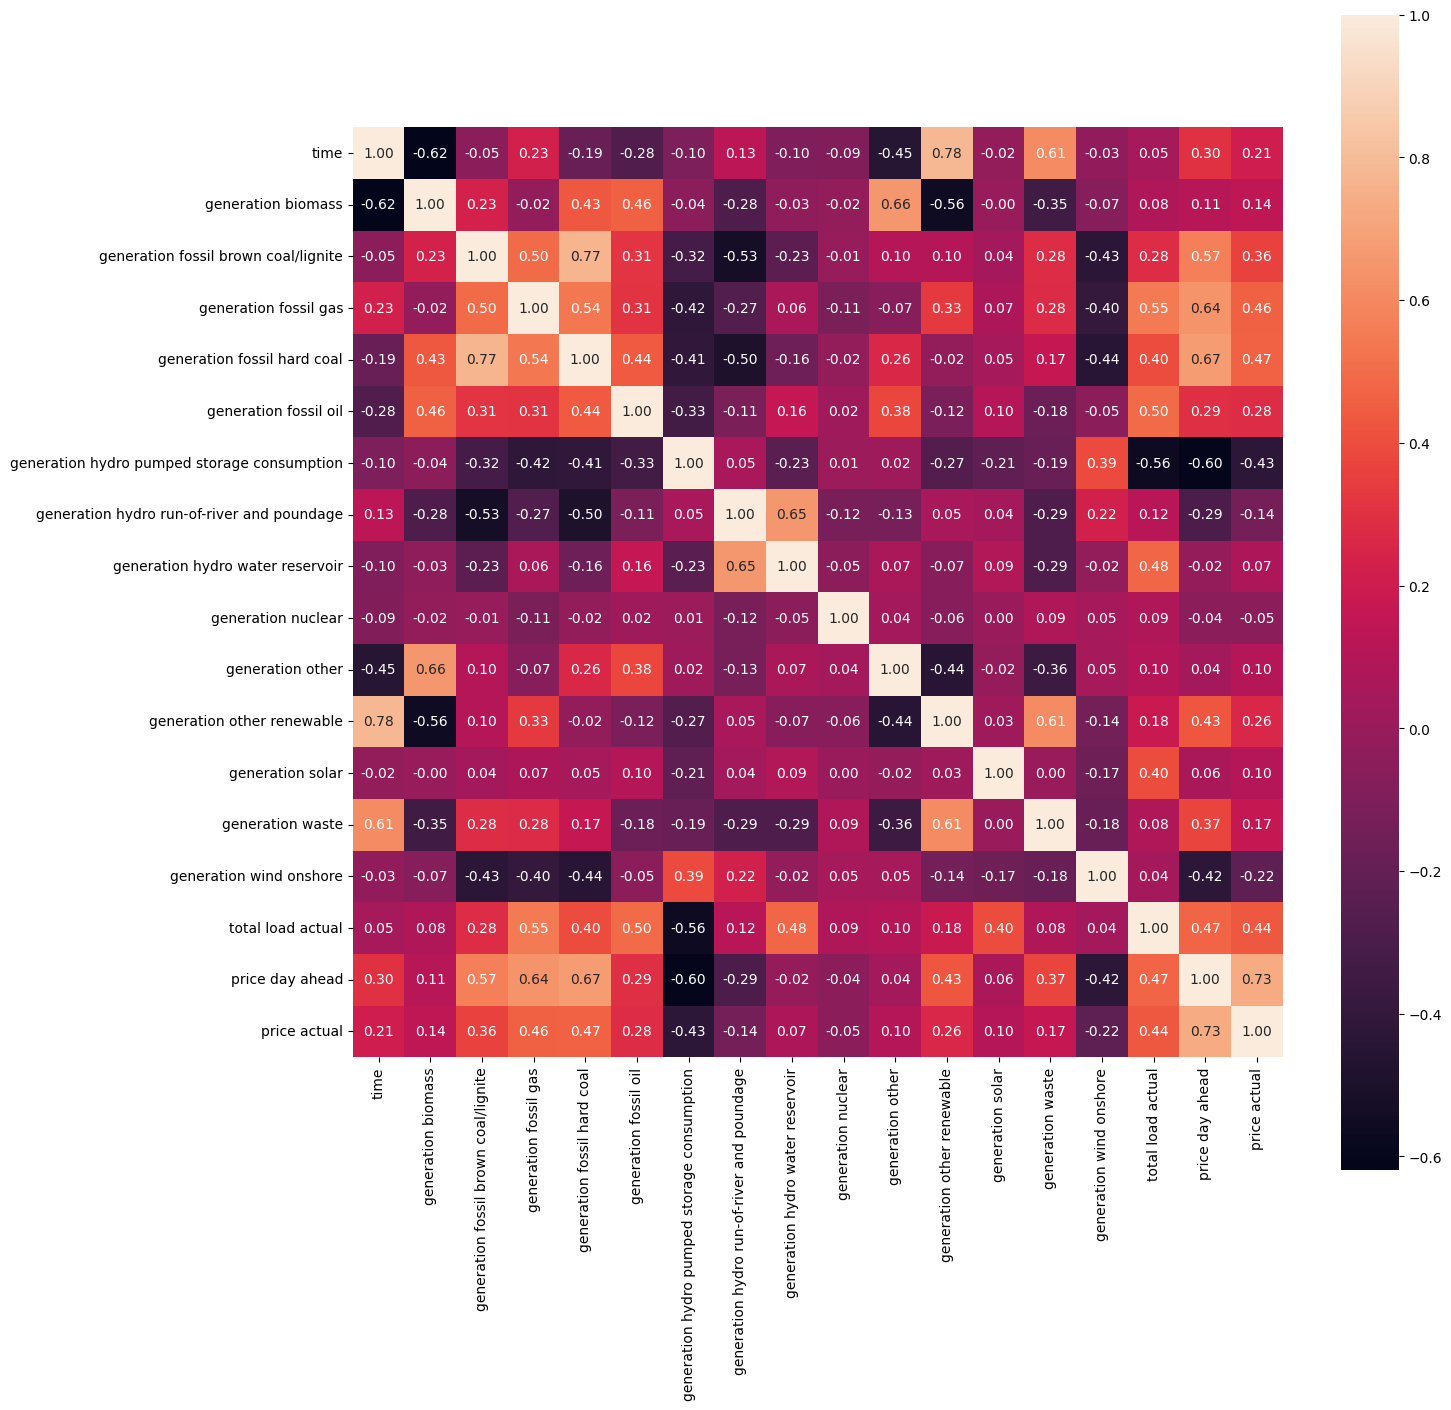

In [32]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, fmt='.2f', square=True)